In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
import sklearn

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('resttrain.csv')
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


The restaurant_id is not required so we can drop that column.

In [4]:
df.drop(["RESTAURANT_ID","LOCALITY"],axis=1,inplace=True)

In [5]:
df

,TITLE,CUISINES,TIME,CITY,RATING,VOTES,COST
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,3.6,49 votes,1200
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,4.2,30 votes,1500
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,3.8,221 votes,800
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,4.1,24 votes,800
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai,3.8,165 votes,300
...,...,...,...,...,...,...,...
12685,QUICK BITES,"North Indian, Burger, Kebab","12noon – 12midnight (Mon, Tue, Wed, Thu, Sun)...",Hyderabad,3.8,546 votes,500
12686,"CASUAL DINING,BAR","Goan, Continental","12noon – 1am (Mon-Fri),11am – 5pm, 7pm – 1am...",Mumbai,4.3,1214 votes,1800
12687,LOUNGE,"Finger Food, Continental, Asian, Chinese",12noon – 12:30AM (Mon-Sun),Navi Mumbai,4.0,608 votes,1300
12688,CASUAL DINING,"North Indian, South Indian, Chinese, Street Food",6am – 10:45pm (Mon-Sun),Chennai,3.5,32 votes,400


In [6]:
df.shape

(12690, 7)

In [7]:
df.describe(include="all")

,TITLE,CUISINES,TIME,CITY,RATING,VOTES,COST
count,11687,12690,12690,12578,12688,11486,12690.000000
unique,112,4155,2689,359,32,1847,NaN
top,QUICK BITES,South Indian,11am – 11pm (Mon-Sun),Chennai,3.9,44 votes,NaN
freq,4218,532,1415,2174,1238,71,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,655.252246
std,NaN,NaN,NaN,NaN,NaN,NaN,627.003540
min,NaN,NaN,NaN,NaN,NaN,NaN,20.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,300.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,500.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,800.000000


# EDA

check for duplicates

In [8]:
df=df.drop_duplicates()

In [9]:
df.shape

(12639, 7)

There are some duplicates that are been removed

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12639 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   TITLE     11639 non-null  object
 1   CUISINES  12639 non-null  object
 2   TIME      12639 non-null  object
 3   CITY      12527 non-null  object
 4   RATING    12637 non-null  object
 5   VOTES     11465 non-null  object
 6   COST      12639 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 789.9+ KB


In [11]:
df.isnull().sum()

TITLE       1000
CUISINES       0
TIME           0
CITY         112
RATING         2
VOTES       1174
COST           0
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(10574, 7)

In [14]:
df['VOTES'].value_counts()

VOTES
44 votes      64
38 votes      61
24 votes      59
28 votes      58
35 votes      57
              ..
1598 votes     1
2241 votes     1
1817 votes     1
1930 votes     1
1214 votes     1
Name: count, Length: 1830, dtype: int64

In [15]:
df['VOTES'] = df['VOTES'].str.replace('votes', '').astype(int)

In [16]:
df['RATING'] = df['RATING'].astype(float)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10574 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     10574 non-null  object 
 1   CUISINES  10574 non-null  object 
 2   TIME      10574 non-null  object 
 3   CITY      10574 non-null  object 
 4   RATING    10574 non-null  float64
 5   VOTES     10574 non-null  int32  
 6   COST      10574 non-null  int64  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 619.6+ KB


In [18]:
categorical_cols=[]
numerical_cols=[]
for x in df.columns:
    if df.dtypes[x]== 'object' :
        categorical_cols.append(x)
    elif df.dtypes[x]=='float64' or df.dtypes[x]=='int64' or df.dtypes[x]=='int32':
        numerical_cols.append(x)

In [19]:
df[categorical_cols].head()

,TITLE,CUISINES,TIME,CITY
0,CASUAL DINING,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane
1,"CASUAL DINING,BAR","Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai
2,CASUAL DINING,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai
3,QUICK BITES,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai
4,DESSERT PARLOR,Desserts,11am – 1am (Mon-Sun),Mumbai


In [20]:
df[numerical_cols].head()

,RATING,VOTES,COST
0,3.6,49,1200
1,4.2,30,1500
2,3.8,221,800
3,4.1,24,800
4,3.8,165,300


Outliers

RATING       Axes(0.125,0.712609;0.227941x0.167391)
VOTES     Axes(0.398529,0.712609;0.227941x0.167391)
COST      Axes(0.672059,0.712609;0.227941x0.167391)
dtype: object

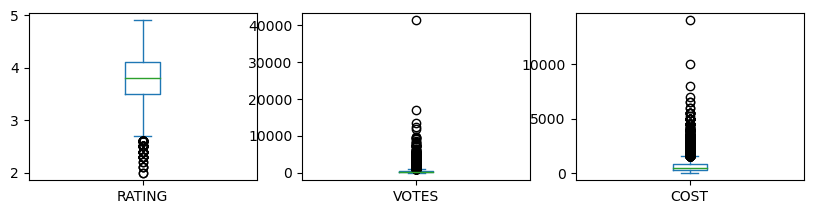

In [21]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

In [22]:
for i in numerical_cols:
    IQR=df[i].quantile(0.75)-df[i].quantile(0.25)

    Q1=df[i].quantile(0.25)

    Q2=df[i].quantile(0.75)

    lowl=Q1-1.5*IQR
    print(lowl)
    upperl=Q2+1.5*IQR
    print(upperl)
    
    new_df=df[i].copy()
    
    new_df=np.where(new_df > upperl , upperl ,
                           np.where(new_df <lowl, lowl ,new_df
                                   )
                           )
    df[i]=new_df

2.6000000000000005
4.999999999999999
-564.5
1095.5
-450.0
1550.0


RATING       Axes(0.125,0.712609;0.227941x0.167391)
VOTES     Axes(0.398529,0.712609;0.227941x0.167391)
COST      Axes(0.672059,0.712609;0.227941x0.167391)
dtype: object

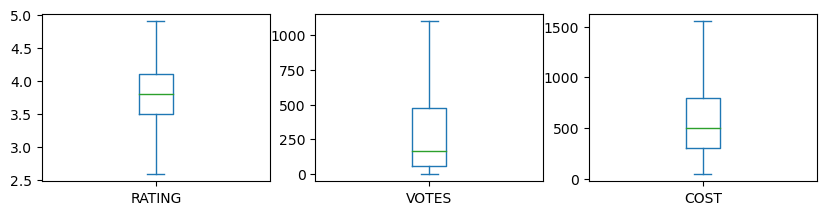

In [23]:
df[numerical_cols].plot(kind='box',subplots=True,layout=(4,3),figsize=(10,10))

Encoding technique

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
le=LabelEncoder()

In [26]:
for i in df[categorical_cols]:
    df[i]=le.fit_transform(df[i])
df

,TITLE,CUISINES,TIME,CITY,RATING,VOTES,COST
0,29,2360,656,267,3.6,49.0,1200.0
1,31,262,1682,55,4.2,30.0,1500.0
2,29,2680,584,55,3.8,221.0,800.0
3,92,3733,238,187,4.1,24.0,800.0
4,48,1596,543,187,3.8,165.0,300.0
...,...,...,...,...,...,...,...
12685,92,2640,1020,114,3.8,546.0,500.0
12686,31,1938,1051,187,4.3,1095.5,1550.0
12687,69,1884,1013,199,4.0,608.0,1300.0
12688,29,3163,1641,55,3.5,32.0,400.0


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10574 entries, 0 to 12689
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   TITLE     10574 non-null  int32  
 1   CUISINES  10574 non-null  int32  
 2   TIME      10574 non-null  int32  
 3   CITY      10574 non-null  int32  
 4   RATING    10574 non-null  float64
 5   VOTES     10574 non-null  float64
 6   COST      10574 non-null  float64
dtypes: float64(3), int32(4)
memory usage: 495.7 KB


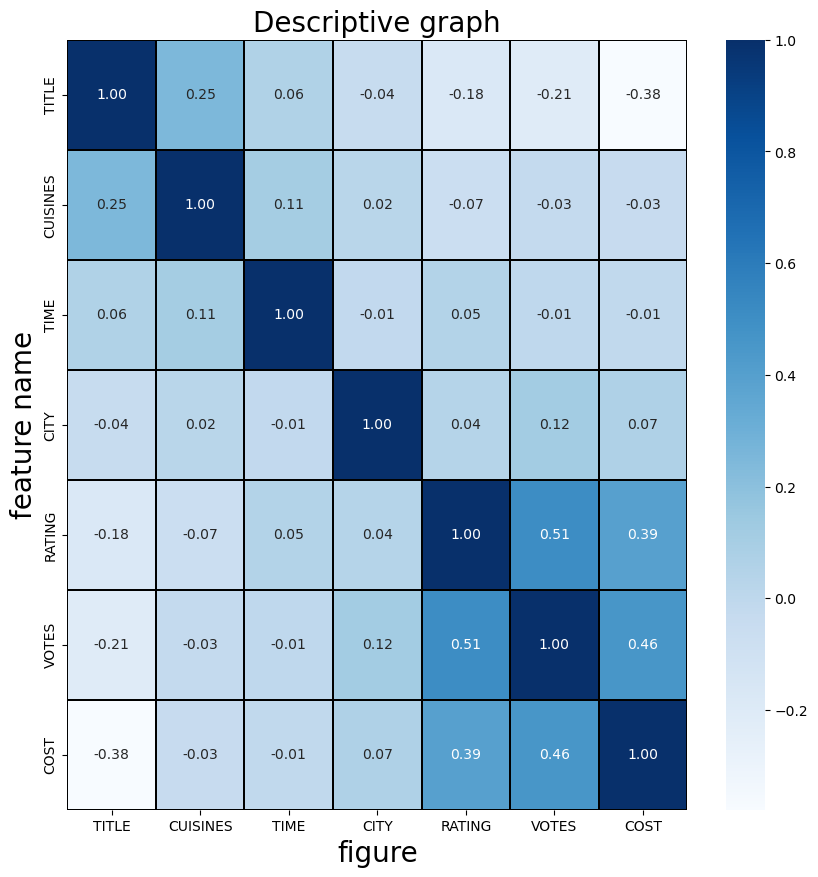

In [28]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Blues')
plt.xlabel('figure',fontsize=20)
plt.ylabel('feature name',fontsize=20)
plt.title('Descriptive graph',fontsize=20)
plt.show()

SO there is no high correlation between the features

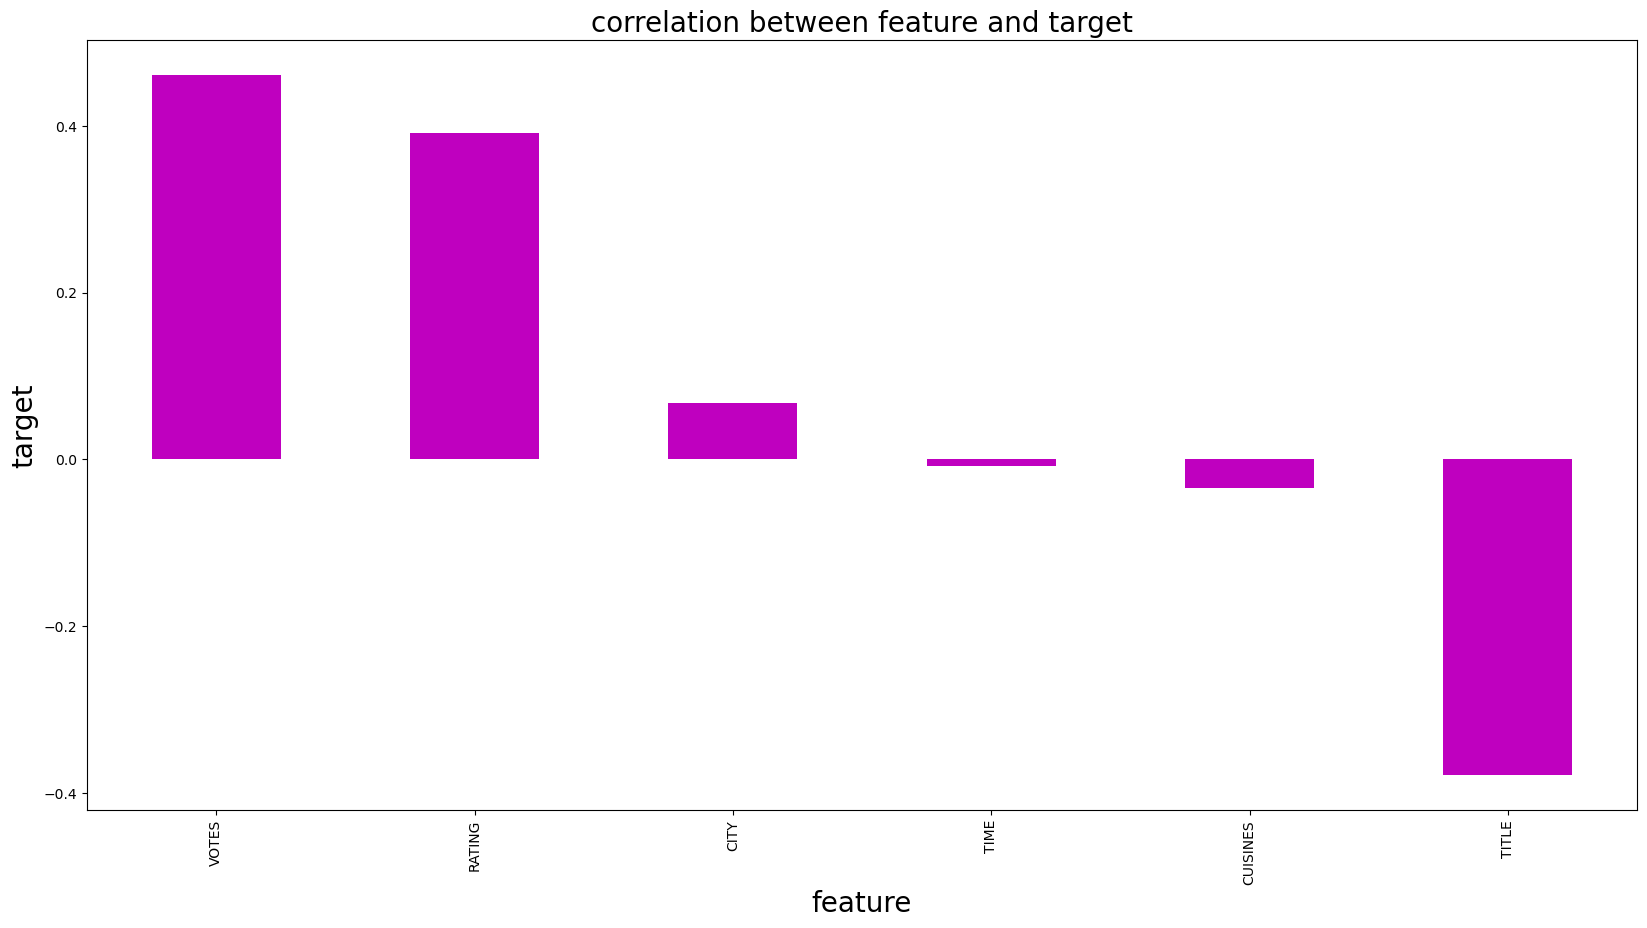

In [29]:
plt.figure(figsize=(20,10))
df.corr()['COST'].sort_values(ascending = False).drop(['COST']).plot(kind='bar',color='m')
plt.xlabel('feature',fontsize=20)
plt.ylabel('target',fontsize=20)
plt.title('correlation between feature and target',fontsize=20)
plt.show()

we can see that the time and cuisines are least correlated so those columns can dropped

In [30]:
df.drop(['TIME','CUISINES','TITLE','CITY'],axis=1,inplace=True)

In [31]:
df

,RATING,VOTES,COST
0,3.6,49.0,1200.0
1,4.2,30.0,1500.0
2,3.8,221.0,800.0
3,4.1,24.0,800.0
4,3.8,165.0,300.0
...,...,...,...
12685,3.8,546.0,500.0
12686,4.3,1095.5,1550.0
12687,4.0,608.0,1300.0
12688,3.5,32.0,400.0


In [32]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features=correlation(df,0.7)
corr_features

set()

In [34]:
x=df.drop(['COST'],axis=1)
y=df['COST']

Scaling of the parameters

In [35]:
scaler=StandardScaler()
X=scaler.fit_transform(x)
X

array([[-0.4414104 , -0.78015959],
       [ 0.98959837, -0.83481533],
       [ 0.03559252, -0.28538126],
       ...,
       [ 0.51259544,  0.82786999],
       [-0.67991186, -0.8290621 ],
       [-0.91841333,  1.02635665]])

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

In [37]:
lr=LinearRegression()
maxAcc=0
rs=0
for i in range(200):
    x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    ac=r2_score(y_test,pred)
    if ac>maxAcc:
        maxAcc=ac
        rs=i
        
print("Best score ",maxAcc)
print("random state ",rs)

Best score  0.27616862344952475
random state  29
